In [1]:
import numpy as np
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt

In [7]:
hillary = pd.read_csv("../New folder/2016/Hillary.csv", encoding = "ISO-8859-1", parse_dates = ['timestamp'])
clinton = pd.read_csv("../New folder/2016/Clinton.csv", encoding = "ISO-8859-1", parse_dates = ['timestamp'])
hillary = pd.concat([hillary, clinton], ignore_index=True, join="inner")
hillary = hillary[hillary['timestamp'] > datetime(2016, 1, 1)]
hillary.sort_values(['timestamp'], inplace = True)
hillary = hillary.drop_duplicates(['id'])

trump = pd.read_csv("../New folder/2016/Trump.csv", encoding = "ISO-8859-1", parse_dates = ['timestamp'])
donald = pd.read_csv("../New folder/2016/Donald.csv", encoding = "ISO-8859-1", parse_dates = ['timestamp'])
trump = pd.concat([trump, donald], ignore_index=True, join="inner")
trump = trump[trump['timestamp'] > datetime(2016, 1, 1)]
trump.sort_values(['timestamp'], inplace = True)
trump = trump.drop_duplicates(['id'])

c:\users\yeshuchuan\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (180) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\users\yeshuchuan\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (198) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
hillary['year'] = pd.DatetimeIndex(hillary['timestamp']).year
hillary['month'] = pd.DatetimeIndex(hillary['timestamp']).month
hillary_agg = hillary.groupby([hillary['year'], hillary['month']])['likes'].sum()

trump['year'] = pd.DatetimeIndex(trump['timestamp']).year
trump['month'] = pd.DatetimeIndex(trump['timestamp']).month
trump_agg = trump.groupby([trump['year'], trump['month']])['likes'].sum()

data = pd.concat([hillary_agg, trump_agg], axis = 1)
data.columns = ['Hillary', 'Trump']

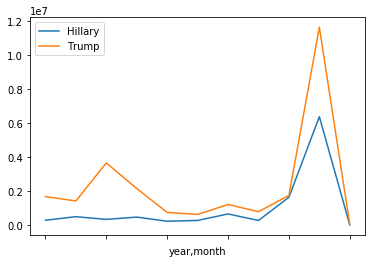

In [9]:
data.plot()